In [1]:
import _pickle as cPickle
import gzip
import numpy as np
class Mnist_Loader:
    def load_data(self):
        f = gzip.open("./data/mnist.pkl.gz", 'rb')
        training_data, validation_data, test_data = cPickle.load(f,encoding='iso-8859-1')
        f.close()
        return (training_data, validation_data, test_data)
    def load_data_wrapper(self):
        tr_d, va_d, te_d = self.load_data()
        training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
        training_results = [self.vectorized_result(y) for y in tr_d[1]]
        training_data = list(zip(training_inputs, training_results))
        validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
        validation_data = list(zip(validation_inputs, va_d[1]))
        test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
        test_data = list(zip(test_inputs, te_d[1]))
        return (training_data, validation_data, test_data)
    def vectorized_result(self,j):
        e = np.zeros((10, 1))
        e[j] = 1.0
        return e
        

In [2]:
import random
import numpy as np

class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
    
    def sigmoid(self,z):
        return 1.0/(1.0+np.exp(-z))

    def sigmoid_prime(self,z):
        return self.sigmoid(z)*(1-self.sigmoid(z))
    
    def feedforward(self, a):
        for b, w in zip(self.biases, self.weights):
            a = self.sigmoid(np.dot(w, a)+b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta,test_data=None):
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch {0}: {1}/{2}".format(
                    j, self.evaluate(test_data), n_test))
            else:
                print ("Epoch {0} complete".format(j))
    
    def update_mini_batch(self, mini_batch, eta):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]
        
    def backprop(self, x, y):
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            self.sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    
    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)
    

    
    
    


In [3]:
M=Mnist_Loader()
training_data,validation_data,test_data=M.load_data_wrapper()

for i in range(0,784):
        for j in range(0,784):
            if training_data[i][0][j]>0:
                training_data[i][0][j]=1

for i in range(0,784):
    for j in range(0,784):
        if test_data[i][0][j]>0:
            test_data[i][0][j]=1


In [4]:
print(training_data[0][0])

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

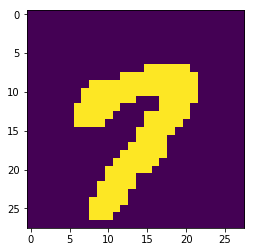

In [5]:
import matplotlib 
from matplotlib import pyplot as plt
im=training_data[15][0]
im=im.reshape((28,28))
plt.imshow(im)
plt.show()

In [6]:
net=Network([784,30,10])
net.SGD(training_data,30,10,3.0,test_data=test_data)

Epoch 0: 8929/10000
Epoch 1: 9083/10000
Epoch 2: 9199/10000
Epoch 3: 9276/10000
Epoch 4: 9348/10000
Epoch 5: 9339/10000
Epoch 6: 9336/10000
Epoch 7: 9353/10000
Epoch 8: 9416/10000
Epoch 9: 9353/10000
Epoch 10: 9424/10000
Epoch 11: 9411/10000
Epoch 12: 9447/10000
Epoch 13: 9436/10000
Epoch 14: 9437/10000
Epoch 15: 9454/10000
Epoch 16: 9451/10000
Epoch 17: 9447/10000
Epoch 18: 9461/10000
Epoch 19: 9439/10000
Epoch 20: 9474/10000
Epoch 21: 9469/10000
Epoch 22: 9465/10000
Epoch 23: 9447/10000
Epoch 24: 9462/10000
Epoch 25: 9456/10000
Epoch 26: 9457/10000
Epoch 27: 9462/10000
Epoch 28: 9456/10000
Epoch 29: 9476/10000


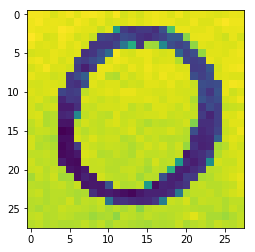

[[160]
 [160]
 [159]
 [154]
 [158]
 [160]
 [156]
 [160]
 [161]
 [159]
 [155]
 [161]
 [153]
 [156]
 [153]
 [157]
 [159]
 [158]
 [155]
 [159]
 [154]
 [157]
 [157]
 [156]
 [155]
 [156]
 [158]
 [157]
 [159]
 [161]
 [157]
 [158]
 [157]
 [155]
 [160]
 [158]
 [154]
 [158]
 [153]
 [155]
 [155]
 [157]
 [155]
 [157]
 [159]
 [158]
 [158]
 [155]
 [155]
 [159]
 [155]
 [155]
 [159]
 [162]
 [159]
 [159]
 [159]
 [157]
 [158]
 [157]
 [162]
 [160]
 [157]
 [156]
 [156]
 [150]
 [156]
 [ 91]
 [ 34]
 [ 28]
 [ 32]
 [ 32]
 [ 27]
 [ 45]
 [119]
 [158]
 [158]
 [156]
 [156]
 [158]
 [155]
 [158]
 [157]
 [158]
 [163]
 [159]
 [153]
 [154]
 [160]
 [158]
 [152]
 [155]
 [149]
 [ 39]
 [ 36]
 [ 32]
 [ 42]
 [ 39]
 [ 29]
 [ 26]
 [ 32]
 [ 37]
 [ 50]
 [ 49]
 [136]
 [157]
 [158]
 [158]
 [154]
 [151]
 [157]
 [153]
 [159]
 [155]
 [156]
 [155]
 [159]
 [155]
 [157]
 [152]
 [ 30]
 [ 31]
 [ 31]
 [ 39]
 [ 68]
 [103]
 [ 30]
 [141]
 [140]
 [ 79]
 [ 43]
 [ 37]
 [ 43]
 [137]
 [156]
 [154]
 [156]
 [155]
 [154]
 [157]
 [153]
 [154]
 [154]

In [12]:
import cv2
import numpy as np
!cd C:\Users\Saloni Dash\Machine Learning\Handwritten Digits
img=cv2.imread('Test-0.jpg')
img=cv2.cvtColor(np.asarray(img),cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
plt.imshow(img)
plt.show()
img=img.reshape((784,1))
print(img)

In [13]:
#Useful l=np.array(img).tolist()
# Useful Function- c=max(l,key=l.count)
mean=np.mean(img)
var=np.var(img)
s=var/784
print(var/784)

3.11750491664


In [14]:
for row in range(0,784):
        if(img[row]>(mean-s)):
            img[row]=0
        else:
            img[row]=1


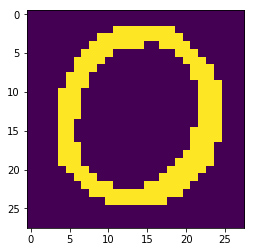

In [15]:
plt.imshow(img.reshape((28,28)))
plt.show()

In [16]:
print(np.argmax(net.feedforward(img)))

0
